<a href="https://colab.research.google.com/github/yardenas/ethz-intro-ml/blob/master/project_4/cnns4food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4 - Food Classification using CNNs
``` <Explain what's going on here> ```

https://www.tensorflow.org/tutorials/images/cnn

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from PIL import Image
from IPython.display import display, Image

# Import dataset

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading up the images into numpy arrays, following https://www.kaggle.com/lgmoneda/from-image-files-to-numpy-arrays

Found 10001 images
Example image:


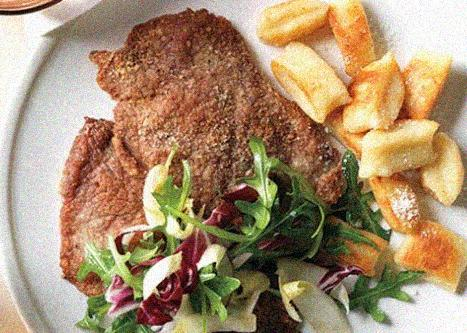

In [11]:
folder = '/content/drive/My Drive/Colab Notebooks/'
filenames = [file for file in os.listdir(folder + 'food') 
if os.path.isfile(os.path.join(folder + 'food', file))]

print("Found {} images".format(len(filenames)))
print("Example image:")
display(Image(folder + 'food/' + filenames[0]))

In [0]:
IMG_WIDTH = 32
IMG_HEIGHT = 32
def load_image(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def load_triplets_b(triplet):
  ids = tf.strings.split(
      triplet
  )
  a = load_image(tf.io.read_file(folder + 'food/' + ids[0] + '.jpg'))
  b = load_image(tf.io.read_file(folder + 'food/' + ids[1] + '.jpg'))
  c = load_image(tf.io.read_file(folder + 'food/' + ids[2] + '.jpg'))
  return tf.concat([a, b, c], axis=2), 1

def load_triplets_c(triplet):
  ids = tf.strings.split(
      triplet
  )
  a = load_image(tf.io.read_file(folder + 'food/' + ids[0] + '.jpg'))
  b = load_image(tf.io.read_file(folder + 'food/' + ids[1] + '.jpg'))
  c = load_image(tf.io.read_file(folder + 'food/' + ids[2] + '.jpg'))
  return tf.concat([a, c, b], axis=2), 0


In [0]:
dataset = tf.data.TextLineDataset(
    folder + 'train_triplets.txt'
)
dataset_b = dataset.map(load_triplets_b,
                        num_parallel_calls=tf.data.experimental.AUTOTUNE,
                        deterministic=False)
dataset_c = dataset.map(load_triplets_c,
                        num_parallel_calls=tf.data.experimental.AUTOTUNE,
                        deterministic=False)
dataset = dataset_b.concatenate(dataset_c)

## Build the model


In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(2))
model.summary()

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(dataset, epochs=10)

Epoch 1/10


ValueError: ignored